In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

from microcity.geom import curvature_radius, resample_polyline

In [2]:
def plot_polyline_with_curvature(
    points: jnp.ndarray,
    min_radius: float = 5.0,
    max_radius: float = 20.0,
    cmap: str = "viridis",
):
    """
    Plot a polyline with interior points colored based on curvature radius.

    Parameters
    ----------
    points : jax.numpy.ndarray
        An (N, 2) array of (x, y) coordinates representing the polyline vertices.

    min_radius : float, optional
        The minimum radius to clamp curvature values. Radii below this will be set to min_radius.
        Default is 5.0.

    max_radius : float, optional
        The maximum radius to clamp curvature values. Radii above this will be set to max_radius.
        Default is 20.0.

    cmap : str, optional
        The matplotlib colormap to use for coloring the points. Default is 'viridis'.

    title : str, optional
        The title of the plot. Default is "Polyline with Curvature-Based Coloring".
    """
    if points.shape[0] < 3:
        raise ValueError(
            "At least three points are required to plot curvature-based colors."
        )

    curvature_radii = curvature_radius(points)

    # Clamp the curvature radii
    clamped_radii = jnp.clip(curvature_radii, min_radius, max_radius)

    # Convert to NumPy arrays for plotting
    points_np = np.array(points)
    clamped_radii_np = np.array(clamped_radii)

    # Extract interior points
    interior_points = points_np[1:-1]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the entire polyline as a thin gray line
    ax.plot(
        points_np[:, 0],
        points_np[:, 1],
        "-",
        color="lightgray",
        linewidth=2,
        label="Original Polyline",
    )

    # Scatter plot of interior points colored by normalized curvature radius
    scatter = ax.scatter(
        interior_points[:, 0],
        interior_points[:, 1],
        c=clamped_radii_np,
        cmap=cmap,
        edgecolor="k",
        s=100,
        label="Interior Points",
    )

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    # cbar.set_label('Clamped Curvature Radius (m)', fontsize=12)
    ## Set colorbar ticks based on min and max radii
    # cbar_ticks = np.linspace(0, 1, num=6)
    # cbar.set_ticks(cbar_ticks)
    # cbar.set_ticklabels(np.round(min_radius + cbar_ticks * (max_radius - min_radius), 1))

    # Labels and title
    ax.set_xlabel("X Coordinate (m)", fontsize=12)
    ax.set_ylabel("Y Coordinate (m)", fontsize=12)
    ax.legend()
    ax.set_aspect("equal", "box")

    # Show the plot
    plt.tight_layout()
    plt.show()


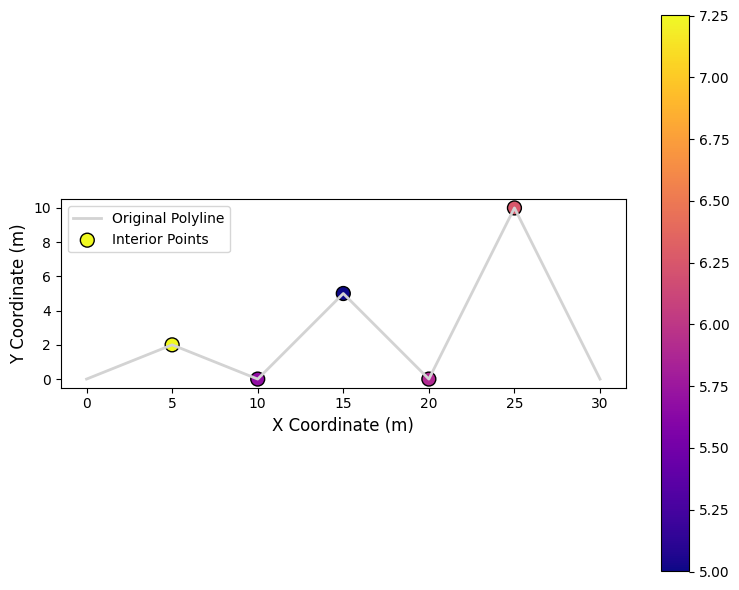

In [3]:

# Define an example polyline (Nx2 JAX array)
original_points = jnp.array([
    [0.0, 0.0],
    [5.0, 2.0],
    [10.0, 0.0],
    [15.0, 5.0],
    [20.0, 0.0],
    [25.0, 10.0],
    [30.0, 0.0]
])

# Plot the polyline with curvature-based coloring
plot_polyline_with_curvature(original_points,
                              min_radius=5.0, max_radius=20.0,
                              cmap='plasma')

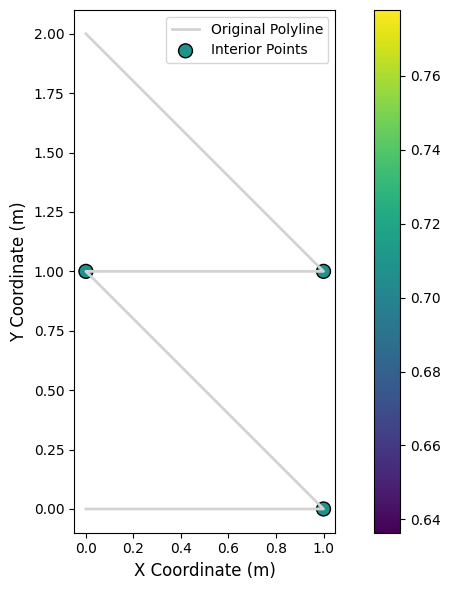

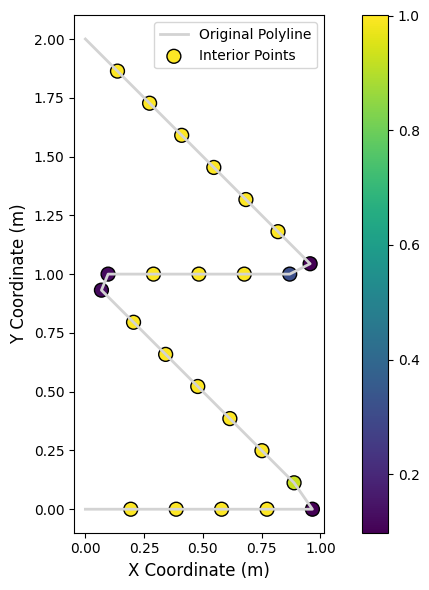

In [4]:
# Example original polyline (in JAX) -- simple triangular path
original_points = jnp.array(
    [
        [0.0, 0.0],
        [1.0, 0.0],
        [0.0, 1.0],
        [1.0, 1.0],
        [0.0, 2.0],
    ]
)

plot_polyline_with_curvature(original_points, 0, 1)

# Get the resampled polyline
resampled_points = resample_polyline(original_points, max_step=0.2)

# Plot them
plot_polyline_with_curvature(resampled_points, 0, 1)
